In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [35]:
df=pd.read_csv("movie_metadata.csv")
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

In [31]:
len(df)

5043

In [50]:
df.isnull().sum(axis=0)

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [177]:
df2 = df[['color','director_name', 'num_critic_for_reviews','duration','director_facebook_likes','actor_3_facebook_likes','actor_2_name',
          'actor_1_facebook_likes','gross','genres', 'actor_1_name','actor_3_name','movie_title','facenumber_in_poster',
         'plot_keywords','num_user_for_reviews','language' ,
         'country','content_rating','budget','title_year','actor_2_facebook_likes',
         'aspect_ratio','imdb_score','movie_imdb_link','movie_facebook_likes']].dropna()

In [178]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3756 entries, 0 to 5042
Data columns (total 26 columns):
color                      3756 non-null object
director_name              3756 non-null object
num_critic_for_reviews     3756 non-null float64
duration                   3756 non-null float64
director_facebook_likes    3756 non-null float64
actor_3_facebook_likes     3756 non-null float64
actor_2_name               3756 non-null object
actor_1_facebook_likes     3756 non-null float64
gross                      3756 non-null float64
genres                     3756 non-null object
actor_1_name               3756 non-null object
actor_3_name               3756 non-null object
movie_title                3756 non-null object
facenumber_in_poster       3756 non-null float64
plot_keywords              3756 non-null object
num_user_for_reviews       3756 non-null float64
language                   3756 non-null object
country                    3756 non-null object
content_rating       

In [ ]:
df2 = df.drop_duplicates()

可视化基础分析

In [200]:
#票房最好
df2.sort_values('gross', ascending=False)[['movie_title', 'budget']][0:10]

,movie_title,budget
0,Avatar,237000000.0
26,Titanic,200000000.0
29,Jurassic World,150000000.0
794,The Avengers,220000000.0
17,The Avengers,220000000.0
66,The Dark Knight,185000000.0
240,Star Wars: Episode I - The Phantom Menace,115000000.0
3024,Star Wars: Episode IV - A New Hope,11000000.0
8,Avengers: Age of Ultron,250000000.0
3,The Dark Knight Rises,250000000.0


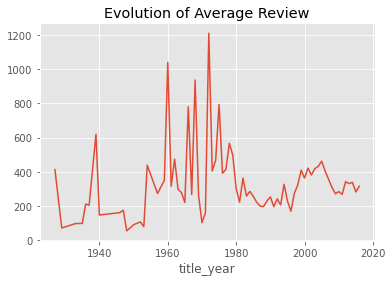

In [202]:
vote_by_year = df2.groupby('title_year').num_user_for_reviews.mean()
vote_by_year.plot(title = 'Evolution of Average Review')

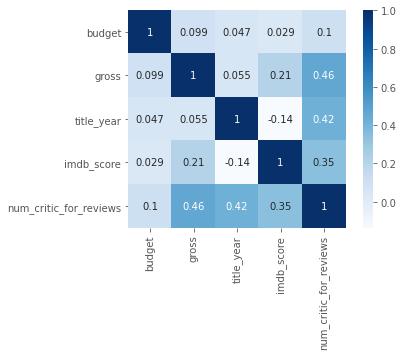

In [199]:
#票房分析
popularity = df3[['budget','gross','title_year','imdb_score','num_critic_for_reviews']]
sns.heatmap(popularity.corr(), annot=True, vmax=1, square=True, cmap="Blues")
#票房与预算、评论数的相关性较大，但评论数和票房一样，只能等到电影上映后才知道具体数值。
#评分与票房、预算、热度、评论数的相关性都不大。

In [195]:
revenue_of_director = df2
revenue_of_director = revenue_of_director.groupby('director_name').gross.mean()

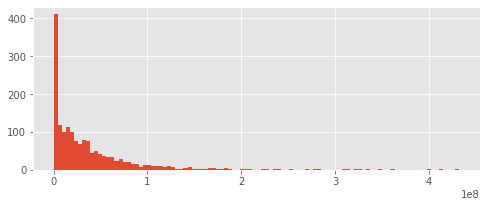

In [197]:
revenue_of_director.hist(bins=100, figsize=(8,3))
#典型的长尾分布，极少数导演的吸金能力特别强.

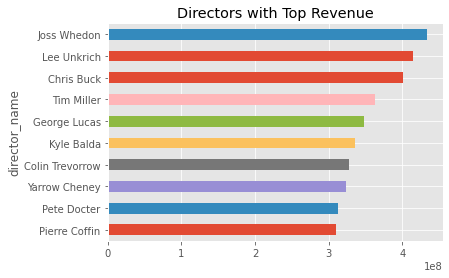

In [196]:
revenue_of_director.sort_values().tail(10).plot(kind = 'barh', title = 'Directors with Top Revenue')
#卡梅隆导演一枝独秀，由他执导的影片的票房远远超过了其他导演。第二至四名都是动画片导演，从前面的分析我们已得知，动画片是平均票房最高的影片类型，因此这几位导演未必真的比拍其他类型影片的导演更有吸金能力，而可能只是有动画片这个类型的加成。若要排除类型的干扰，可以分类型进行排序。例如，我们看一下科幻片中吸金能力最强的导演：

In [192]:
revenue_of_actor = df2
revenue_of_actor = revenue_of_actor.groupby('actor_1_name').gross.mean()

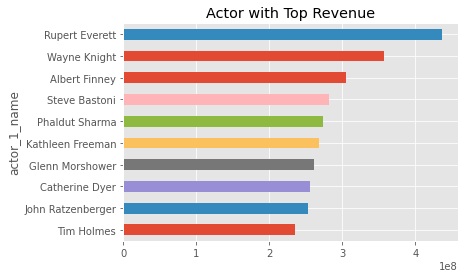

In [193]:
revenue_of_actor.sort_values().tail(10).plot(kind = 'barh', title = 'Actor with Top Revenue')


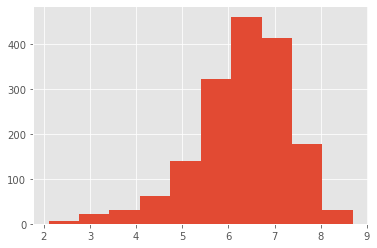

In [191]:
vote_of_director = df2.groupby('director_name').imdb_score.mean()    #平均评分
vote_of_director.hist()

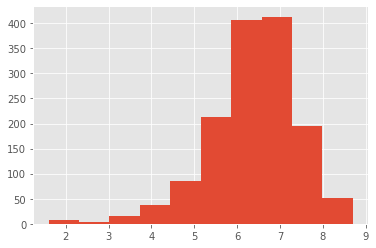

In [187]:
vote_of_actor = df2.groupby('actor_1_name').imdb_score.mean()    #平均评分
vote_of_actor.hist()

In [194]:
df2.sort_values('imdb_score', ascending=False)[['content_rating']][0:10]

,content_rating
1937,R
3466,R
66,PG-13
2837,R
339,PG-13
4498,Approved
1874,R
3355,R
836,PG-13
270,PG-13


In [206]:
df2['color'] = df2['color'].astype('category')
df2['color'] = df2['color'].cat.codes

In [207]:
df2['director_name'] = df2['director_name'].astype('category')
df2['director_name'] = df2['director_name'].cat.codes

In [208]:
df2['actor_1_name'] = df2['actor_1_name'].astype('category')
df2['actor_1_name'] = df2['actor_1_name'].cat.codes
df2['actor_2_name'] = df2['actor_2_name'].astype('category')
df2['actor_2_name'] = df2['actor_2_name'].cat.codes
df2['actor_3_name'] = df2['actor_3_name'].astype('category')
df2['actor_3_name'] = df2['actor_3_name'].cat.codes
df2['language'] = df2['language'].astype('category')
df2['language'] = df2['language'].cat.codes

In [209]:
df2['imdb_score'] = df2['imdb_score'].astype('category')
df2['imdb_score'] = df2['imdb_score'].cat.codes
df2['aspect_ratio'] = df2['aspect_ratio'].astype('category')
df2['aspect_ratio'] = df2['aspect_ratio'].cat.codes

In [210]:
df2['country'] = df2['country'].astype('category')
df2['country'] = df2['country'].cat.codes

In [211]:
df2['content_rating'] = df2['content_rating'].astype('category')
df2['content_rating'] = df2['content_rating'].cat.codes

In [212]:
df2['num_user_for_reviews'] = df2['num_user_for_reviews'].astype('float64')

In [213]:
#都是来自同一网站
df2=df2.drop(columns=['movie_imdb_link'])

In [217]:
#存在随机性
df2=df2.drop(columns=['movie_title'])

In [218]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3756 entries, 0 to 5042
Data columns (total 23 columns):
color                      3756 non-null int8
director_name              3756 non-null int16
num_critic_for_reviews     3756 non-null float64
duration                   3756 non-null float64
director_facebook_likes    3756 non-null float64
actor_3_facebook_likes     3756 non-null float64
actor_2_name               3756 non-null int16
actor_1_facebook_likes     3756 non-null float64
gross                      3756 non-null float64
genres                     3756 non-null object
actor_1_name               3756 non-null int16
actor_3_name               3756 non-null int16
facenumber_in_poster       3756 non-null float64
num_user_for_reviews       3756 non-null float64
language                   3756 non-null int8
country                    3756 non-null int8
content_rating             3756 non-null int8
budget                     3756 non-null float64
title_year                 3756 

In [219]:
df2.describe()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,aspect_ratio,imdb_score,movie_facebook_likes
count,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000,3.756000e+03,3756.000000,...,3756.000000,3756.000000,3756.000000,3756.000000,3.756000e+03,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000
mean,0.966986,858.290202,167.378328,110.257987,807.336528,771.279553,1090.030618,7751.338658,5.261282e+07,714.665335,...,336.843184,9.353301,39.658679,7.586528,4.623685e+07,2002.976571,2021.775825,9.988285,45.656550,9353.829340
std,0.178696,484.588350,123.452040,22.646717,3068.171683,1894.249869,638.211500,15519.339621,7.031787e+07,406.199250,...,411.227368,2.434668,9.484312,1.683861,2.260103e+08,9.888108,4544.908236,2.370451,10.543663,21462.889123
min,0.000000,0.000000,2.000000,37.000000,0.000000,0.000000,0.000000,0.000000,1.620000e+02,0.000000,...,4.000000,0.000000,0.000000,0.000000,2.180000e+02,1927.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,442.000000,77.000000,96.000000,11.000000,194.000000,535.000000,745.000000,8.270233e+06,362.000000,...,110.000000,9.000000,43.000000,7.000000,1.000000e+07,1999.000000,384.750000,8.000000,40.000000,0.000000
50%,1.000000,872.000000,138.500000,106.000000,64.000000,436.000000,1080.500000,1000.000000,3.009311e+07,711.500000,...,210.000000,9.000000,43.000000,7.000000,2.500000e+07,2004.000000,685.500000,12.000000,47.000000,227.000000
75%,1.000000,1298.250000,224.000000,120.000000,235.000000,691.000000,1646.000000,13000.000000,6.688194e+07,1057.250000,...,398.250000,9.000000,43.000000,9.000000,5.000000e+07,2010.000000,976.000000,12.000000,53.000000,11000.000000
max,1.000000,1658.000000,813.000000,330.000000,23000.000000,23000.000000,2187.000000,640000.000000,7.605058e+08,1427.000000,...,5060.000000,33.000000,44.000000,11.000000,1.221550e+10,2016.000000,137000.000000,17.000000,73.000000,349000.000000


In [220]:
dfg = df2['genres'].str.split('|', expand=True)
dfg.head()

,0,1,2,3,4,5,6,7
0,Action,Adventure,Fantasy,Sci-Fi,None,None,None,None
1,Action,Adventure,Fantasy,None,None,None,None,None
2,Action,Adventure,Thriller,None,None,None,None,None
3,Action,Thriller,None,None,None,None,None,None
5,Action,Adventure,Sci-Fi,None,None,None,None,None


In [221]:
dfg.rename(columns = {0:"G1",1:'G2',2:'G3',3:'G4',4:'G5',5:'G6',6:'G7',7:'G8'},inplace = True)
dfg.head()

,G1,G2,G3,G4,G5,G6,G7,G8
0,Action,Adventure,Fantasy,Sci-Fi,None,None,None,None
1,Action,Adventure,Fantasy,None,None,None,None,None
2,Action,Adventure,Thriller,None,None,None,None,None
3,Action,Thriller,None,None,None,None,None,None
5,Action,Adventure,Sci-Fi,None,None,None,None,None


In [222]:
dfg['G1'] = dfg['G1'].astype('category')
dfg['G1'] = dfg['G1'].cat.codes
dfg['G2'] = dfg['G2'].astype('category')
dfg['G2'] = dfg['G2'].cat.codes
dfg['G3'] = dfg['G3'].astype('category')
dfg['G3'] = dfg['G3'].cat.codes
dfg['G4'] = dfg['G4'].astype('category')
dfg['G4'] = dfg['G4'].cat.codes
dfg['G5'] = dfg['G5'].astype('category')
dfg['G5'] = dfg['G5'].cat.codes
dfg['G6'] = dfg['G6'].astype('category')
dfg['G6'] = dfg['G6'].cat.codes
dfg['G7'] = dfg['G7'].astype('category')
dfg['G7'] = dfg['G7'].cat.codes
dfg['G8'] = dfg['G8'].astype('category')
dfg['G8'] = dfg['G8'].cat.codes

In [223]:
df3 = pd.concat([df2,dfg],axis=1 )

In [224]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3756 entries, 0 to 5042
Data columns (total 31 columns):
color                      3756 non-null int8
director_name              3756 non-null int16
num_critic_for_reviews     3756 non-null float64
duration                   3756 non-null float64
director_facebook_likes    3756 non-null float64
actor_3_facebook_likes     3756 non-null float64
actor_2_name               3756 non-null int16
actor_1_facebook_likes     3756 non-null float64
gross                      3756 non-null float64
genres                     3756 non-null object
actor_1_name               3756 non-null int16
actor_3_name               3756 non-null int16
facenumber_in_poster       3756 non-null float64
num_user_for_reviews       3756 non-null float64
language                   3756 non-null int8
country                    3756 non-null int8
content_rating             3756 non-null int8
budget                     3756 non-null float64
title_year                 3756 

In [225]:
df3=df3.drop(columns=['genres'])

In [226]:
df3.describe()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,...,imdb_score,movie_facebook_likes,G1,G2,G3,G4,G5,G6,G7,G8
count,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000,3.756000e+03,3756.000000,...,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000
mean,0.966986,858.290202,167.378328,110.257987,807.336528,771.279553,1090.030618,7751.338658,5.261282e+07,714.665335,...,45.656550,9353.829340,3.618211,6.287007,6.709265,2.160543,-0.016241,-0.869808,-0.975772,-0.998669
std,0.178696,484.588350,123.452040,22.646717,3068.171683,1894.249869,638.211500,15519.339621,7.031787e+07,406.199250,...,10.543663,21462.889123,3.031592,5.287188,7.137279,5.282995,3.203444,0.974691,0.353335,0.048939
min,0.000000,0.000000,2.000000,37.000000,0.000000,0.000000,0.000000,0.000000,1.620000e+02,0.000000,...,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,442.000000,77.000000,96.000000,11.000000,194.000000,535.000000,745.000000,8.270233e+06,362.000000,...,40.000000,0.000000,0.000000,3.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,1.000000,872.000000,138.500000,106.000000,64.000000,436.000000,1080.500000,1000.000000,3.009311e+07,711.500000,...,47.000000,227.000000,4.000000,6.000000,5.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
75%,1.000000,1298.250000,224.000000,120.000000,235.000000,691.000000,1646.000000,13000.000000,6.688194e+07,1057.250000,...,53.000000,11000.000000,5.000000,10.000000,14.000000,4.000000,-1.000000,-1.000000,-1.000000,-1.000000
max,1.000000,1658.000000,813.000000,330.000000,23000.000000,23000.000000,2187.000000,640000.000000,7.605058e+08,1427.000000,...,73.000000,349000.000000,16.000000,19.000000,19.000000,15.000000,14.000000,10.000000,7.000000,1.000000


In [227]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3756 entries, 0 to 5042
Data columns (total 30 columns):
color                      3756 non-null int8
director_name              3756 non-null int16
num_critic_for_reviews     3756 non-null float64
duration                   3756 non-null float64
director_facebook_likes    3756 non-null float64
actor_3_facebook_likes     3756 non-null float64
actor_2_name               3756 non-null int16
actor_1_facebook_likes     3756 non-null float64
gross                      3756 non-null float64
actor_1_name               3756 non-null int16
actor_3_name               3756 non-null int16
facenumber_in_poster       3756 non-null float64
num_user_for_reviews       3756 non-null float64
language                   3756 non-null int8
country                    3756 non-null int8
content_rating             3756 non-null int8
budget                     3756 non-null float64
title_year                 3756 non-null float64
actor_2_facebook_likes     3756

In [228]:
X = df3.drop(['imdb_score'], axis=1)
y = df3['imdb_score']

In [229]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X = scaler.fit_transform(X)
y = np.array(y).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)

In [230]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Logistic Regression accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Logistic Regression accuracy score: 0.0564


C:\Users\yipen\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [239]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
clf = clf.fit(X_train, y_train)
clf_y_predict = clf.predict(X_test)
print(accuracy_score(y_test, clf_y_predict))

0.08945686900958466


In [235]:
from xgboost import XGBRegressor

my_model = XGBRegressor()

my_model.fit(X_train, y_train, verbose=False)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [242]:
XGBy_pred = my_model.predict(X_test)

In [246]:
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(XGBy_pred, y_test)))


Mean Absolute Error : 5.201931858976809
